# Get Data from UK Government Petition Website

Get json data from the page and convert to json object

In [39]:
import json
import requests
import matplotlib.pyplot as plt

# Get the data from the json webpage
url = "https://petition.parliament.uk/petitions/241584.json"
response = requests.get(url)

# Convert to json object
json_data = json.loads(response.content)

### Extract just the constituency-based data
Which has this sort of format
```
[{u'mp': u'Tommy Sheppard MP',
  u'name': u'Edinburgh East',
  u'ons_code': u'S14000022',
  u'signature_count': 12078},
 {u'mp': u'Deidre Brock MP',
  u'name': u'Edinburgh North and Leith',
  u'ons_code': u'S14000023',
  u'signature_count': 17969},
 {u'mp': u'Ian Murray MP',
 ```

In [40]:
constituency_data = json_data['data']['attributes']['signatures_by_constituency']

### Find the 10 constituencies with the highest votes and plot as graph

In [41]:
constituency_data_ordered = sorted(constituency_data, key = lambda x: int(x["signature_count"]))

<Container object of 10 artists>

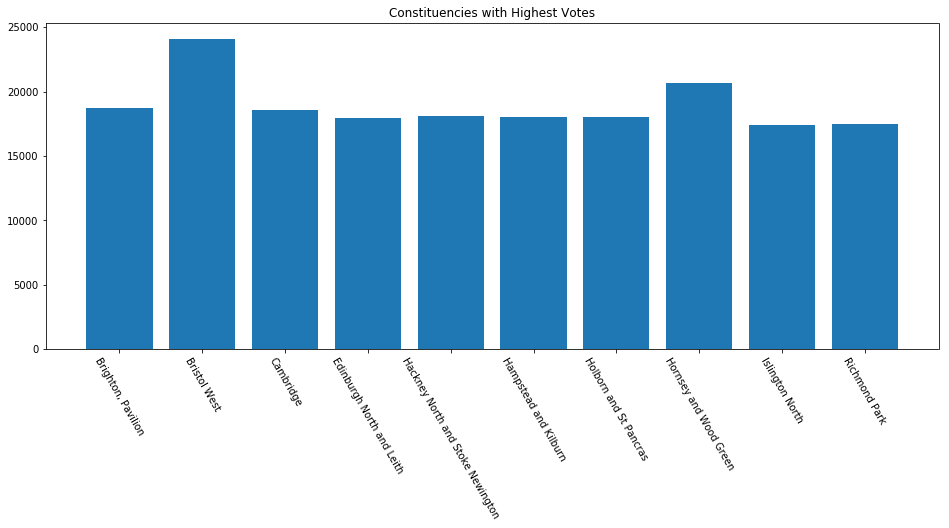

In [61]:
yvalues = [c["signature_count"] for c in constituency_data_ordered[-10:]]
xvalues = [c["name"] for c in constituency_data_ordered[-10:]]
plt.figure(figsize=(16,6))
plt.title("Constituencies with Highest Votes")
plt.xticks(rotation=300)
plt.bar(xvalues, yvalues)


### Constituencies with lowest votes

<Container object of 10 artists>

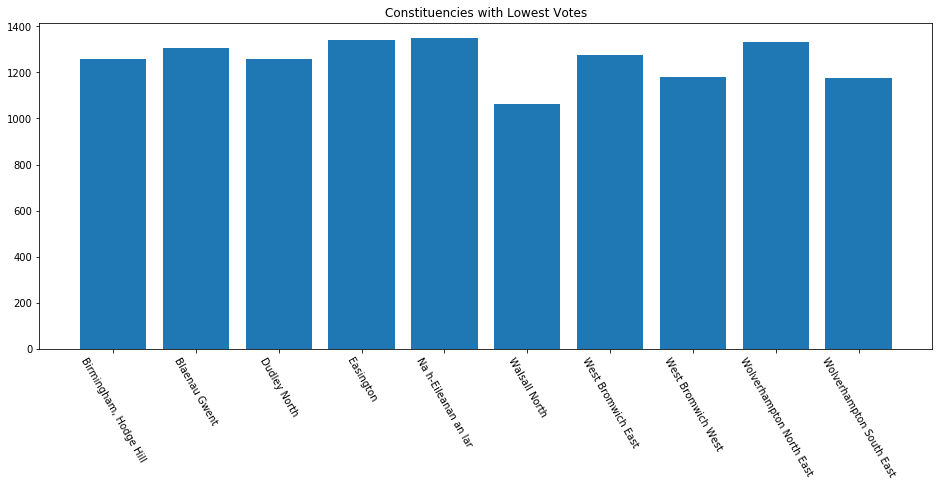

In [60]:
yvalues = [c["signature_count"] for c in constituency_data_ordered[:10]]
xvalues = [c["name"] for c in constituency_data_ordered[:10]]
plt.figure(figsize=(16,6))
plt.title("Constituencies with Lowest Votes")
plt.xticks(rotation=300)
plt.bar(xvalues, yvalues)